# HAR from Continuous Ambient Sensor Classification

#### Importing packages

In [1]:
%matplotlib inline

from fastai.imports import *
from fastai.tabular import *
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
import IPython
from sklearn import metrics
from pandas import read_csv
import pandas as pd
from sklearn_pandas import DataFrameMapper
import sklearn

#### Loading in our data set

In [2]:
PATH = "R:\\ML\\CS545\\casas-dataset\\csh101\\" 

df_raw= pd.read_csv(f'{PATH}csh101.ann.features.csv', low_memory=False)

In [3]:
df_raw

,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,timeSinceLastSensorEvent,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,...,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-Kitchen,sensorElTime-LivingRoom,sensorElTime-Office,sensorElTime-OutsideDoor,sensorElTime-WorkArea,activity
0,10.0,38464.0,4.0,130.0,0.0,0.0,0.0,5.0,5.0,9.0,...,86400.0,86400.000000,86400.0,0.000000,86400.000000,86400.000000,86400.0,1.816728,86400.0,Step_Out
1,10.0,38465.0,4.0,131.0,1.0,0.0,0.0,9.0,9.0,9.0,...,86400.0,86400.000000,86400.0,0.055818,86400.000000,86400.000000,86400.0,0.000000,86400.0,Step_Out
2,10.0,38578.0,4.0,241.0,113.0,0.0,0.0,5.0,5.0,9.0,...,86400.0,86400.000000,86400.0,0.000000,86400.000000,86400.000000,86400.0,113.423815,86400.0,Step_Out
3,10.0,38582.0,4.0,244.0,4.0,0.0,0.0,5.0,5.0,9.0,...,86400.0,86400.000000,86400.0,0.000000,86400.000000,86400.000000,86400.0,117.696845,86400.0,Step_Out
4,10.0,38582.0,4.0,243.0,0.0,0.0,0.0,9.0,9.0,9.0,...,86400.0,86400.000000,86400.0,0.063296,86400.000000,86400.000000,86400.0,0.000000,86400.0,Step_Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321423,23.0,85938.0,0.0,124.0,1.0,1.0,1.0,1.0,1.0,1.0,...,86400.0,3266.294198,86400.0,59.532519,3267.785714,1384.742962,86400.0,1431.566214,86400.0,Other_Activity
321424,23.0,85990.0,0.0,146.0,52.0,1.0,1.0,1.0,1.0,1.0,...,86400.0,3317.884144,86400.0,111.122465,3319.375660,1436.332908,86400.0,1483.156160,86400.0,Other_Activity
321425,23.0,85992.0,0.0,147.0,2.0,1.0,1.0,1.0,1.0,1.0,...,86400.0,3319.782223,86400.0,113.020544,3321.273739,1438.230987,86400.0,1485.054239,86400.0,Other_Activity
321426,23.0,85994.0,0.0,148.0,2.0,1.0,1.0,1.0,1.0,1.0,...,86400.0,3322.384894,86400.0,115.623215,3323.876410,1440.833658,86400.0,1487.656910,86400.0,Other_Activity


In [4]:
df_raw.dtypes

lastSensorEventHours        float64
lastSensorEventSeconds      float64
lastSensorDayOfWeek         float64
windowDuration              float64
timeSinceLastSensorEvent    float64
prevDominantSensor1         float64
prevDominantSensor2         float64
lastSensorID                float64
lastSensorLocation          float64
lastMotionLocation          float64
complexity                  float64
activityChange              float64
areaTransitions             float64
numDistinctSensors          float64
sensorCount-Bathroom        float64
sensorCount-Bedroom         float64
sensorCount-Chair           float64
sensorCount-DiningRoom      float64
sensorCount-Hall            float64
sensorCount-Ignore          float64
sensorCount-Kitchen         float64
sensorCount-LivingRoom      float64
sensorCount-Office          float64
sensorCount-OutsideDoor     float64
sensorCount-WorkArea        float64
sensorElTime-Bathroom       float64
sensorElTime-Bedroom        float64
sensorElTime-Chair          

#### Working to find the weightage of classified events.

In [5]:
def train_cats(df):
    """Change any columns of strings in a panda's dataframe to a column of
    categorical values. This applies the changes inplace.
    Parameters:
    -----------
    df: A pandas dataframe. Any columns of strings will be changed to
        categorical values.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category
    """
    for n,c in df.items():
        if pd.api.types.is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()

In [6]:
train_cats(df_raw)

In [7]:
co=0
coloumn_names=[]
for col in df_raw.columns:  
    co=co+1
    coloumn_names=np.append(coloumn_names,col)
    

co
coloumn_names[32]

'sensorElTime-LivingRoom'

In [8]:
f=pd.DataFrame(df_raw).columns

In [9]:
f

Index(['lastSensorEventHours', 'lastSensorEventSeconds', 'lastSensorDayOfWeek',
       'windowDuration', 'timeSinceLastSensorEvent', 'prevDominantSensor1',
       'prevDominantSensor2', 'lastSensorID', 'lastSensorLocation',
       'lastMotionLocation', 'complexity', 'activityChange', 'areaTransitions',
       'numDistinctSensors', 'sensorCount-Bathroom', 'sensorCount-Bedroom',
       'sensorCount-Chair', 'sensorCount-DiningRoom', 'sensorCount-Hall',
       'sensorCount-Ignore', 'sensorCount-Kitchen', 'sensorCount-LivingRoom',
       'sensorCount-Office', 'sensorCount-OutsideDoor', 'sensorCount-WorkArea',
       'sensorElTime-Bathroom', 'sensorElTime-Bedroom', 'sensorElTime-Chair',
       'sensorElTime-DiningRoom', 'sensorElTime-Hall', 'sensorElTime-Ignore',
       'sensorElTime-Kitchen', 'sensorElTime-LivingRoom',
       'sensorElTime-Office', 'sensorElTime-OutsideDoor',
       'sensorElTime-WorkArea', 'activity'],
      dtype='object')

In [10]:
f1=pd.DataFrame(df_raw).columns[co-1]

In [11]:
f1

'activity'

In [12]:
cat_test=pd.Categorical(df_raw[f])

In [13]:
cat_test

[lastSensorEventHours, lastSensorEventSeconds, lastSensorDayOfWeek, windowDuration, timeSinceLastSensorEvent, ..., sensorElTime-LivingRoom, sensorElTime-Office, sensorElTime-OutsideDoor, sensorElTime-WorkArea, activity]
Length: 37
Categories (37, object): [activity, activityChange, areaTransitions, complexity, ..., sensorElTime-OutsideDoor, sensorElTime-WorkArea, timeSinceLastSensorEvent, windowDuration]

In [14]:
values=df_raw[f1].value_counts()

In [15]:
values

Other_Activity           90824
Watch_TV                 61312
Sleep_Out_Of_Bed         16618
Bathe                    16289
Cook_Breakfast           16279
Dress                    14051
Toilet                   13727
Personal_Hygiene         13221
Sleep                    11752
Read                      8608
Relax                     5777
Cook_Dinner               5557
Drink                     3794
Eat_Breakfast             3564
Morning_Meds              3543
Evening_Meds              3359
Wash_Breakfast_Dishes     3197
Cook_Lunch                3197
Wash_Dishes               3194
Leave_Home                3124
Cook                      2764
Enter_Home                2594
Entertain_Guests          2568
Wash_Dinner_Dishes        2459
Phone                     1846
Groom                     1797
Step_Out                  1491
Eat_Dinner                1092
Eat_Lunch                  866
Wash_Lunch_Dishes          773
Bed_Toilet_Transition      720
Eat                        496
Go_To_Sl

#### Numericalize Categorical Values.

In [16]:
'''def numericalize(df, col, name, max_n_cat):
    """ Changes the column col from a categorical type to it's integer codes.
    Parameters:
    -----------
    df: A pandas dataframe. df[name] will be filled with the integer codes from
        col.
    col: The column you wish to change into the categories.
    name: The column name you wish to insert into df. This column will hold the
        integer codes.
    max_n_cat: If col has more categories than max_n_cat it will not change the
        it to its integer codes. If max_n_cat is None, then col will always be
        converted.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category { a : 1, b : 2}
    >>> numericalize(df, df['col2'], 'col3', None)
       col1 col2 col3
    0     1    a    1
    1     2    b    2
    2     3    a    1
    """
    if not pd.api.types.is_numeric_dtype(col) and ( max_n_cat is None or len(col.cat.categories)>max_n_cat):
        df[name] = pd.Categorical(col).codes+1
'''

'def numericalize(df, col, name, max_n_cat):\n    """ Changes the column col from a categorical type to it\'s integer codes.\n    Parameters:\n    -----------\n    df: A pandas dataframe. df[name] will be filled with the integer codes from\n        col.\n    col: The column you wish to change into the categories.\n    name: The column name you wish to insert into df. This column will hold the\n        integer codes.\n    max_n_cat: If col has more categories than max_n_cat it will not change the\n        it to its integer codes. If max_n_cat is None, then col will always be\n        converted.\n    Examples:\n    ---------\n    >>> df = pd.DataFrame({\'col1\' : [1, 2, 3], \'col2\' : [\'a\', \'b\', \'a\']})\n    >>> df\n       col1 col2\n    0     1    a\n    1     2    b\n    2     3    a\n    note the type of col2 is string\n    >>> train_cats(df)\n    >>> df\n       col1 col2\n    0     1    a\n    1     2    b\n    2     3    a\n    now the type of col2 is category { a : 1, b : 2}\n

In [17]:
#numericalize(df_raw,df_raw['activity'],'NumericalClassification',None)

#### X and Y values

In [34]:
Y_trn=pd.Categorical(df_raw[f1]).codes

In [35]:
Y_trn

array([26, 26, 26, 26, ..., 19, 19, 19, 19], dtype=int8)

In [46]:
X_trn=np.array(df_raw.drop([f1],axis=1))
X_trn

array([[1.000000e+01, 3.846400e+04, 4.000000e+00, 1.300000e+02, ..., 8.640000e+04, 8.640000e+04, 1.816728e+00,
        8.640000e+04],
       [1.000000e+01, 3.846500e+04, 4.000000e+00, 1.310000e+02, ..., 8.640000e+04, 8.640000e+04, 0.000000e+00,
        8.640000e+04],
       [1.000000e+01, 3.857800e+04, 4.000000e+00, 2.410000e+02, ..., 8.640000e+04, 8.640000e+04, 1.134238e+02,
        8.640000e+04],
       [1.000000e+01, 3.858200e+04, 4.000000e+00, 2.440000e+02, ..., 8.640000e+04, 8.640000e+04, 1.176968e+02,
        8.640000e+04],
       ...,
       [2.300000e+01, 8.599000e+04, 0.000000e+00, 1.460000e+02, ..., 1.436333e+03, 8.640000e+04, 1.483156e+03,
        8.640000e+04],
       [2.300000e+01, 8.599200e+04, 0.000000e+00, 1.470000e+02, ..., 1.438231e+03, 8.640000e+04, 1.485054e+03,
        8.640000e+04],
       [2.300000e+01, 8.599400e+04, 0.000000e+00, 1.480000e+02, ..., 1.440834e+03, 8.640000e+04, 1.487657e+03,
        8.640000e+04],
       [2.300000e+01, 8.599500e+04, 0.000000e+00, 

### Check how much to divide into the Validation and Test Set

In [21]:
c=1
k=0
for first,second in zip(df_raw[f1],df_raw[f1][1:]):
    if first==second:
        c = c+1
    elif first!=second:
        print(first,c)
        k=k+c
        c=1

Step_Out 49
Other_Activity 619
Toilet 31
Other_Activity 1
Toilet 1
Other_Activity 3
Toilet 1
Other_Activity 1738
Phone 40
Other_Activity 122
Personal_Hygiene 1
Other_Activity 1
Personal_Hygiene 1
Other_Activity 2
Personal_Hygiene 129
Other_Activity 1
Personal_Hygiene 1
Other_Activity 2
Personal_Hygiene 1
Other_Activity 54
Leave_Home 20
Other_Activity 9
Enter_Home 16
Other_Activity 25
Relax 98
Other_Activity 1
Sleep_Out_Of_Bed 59
Other_Activity 44
Leave_Home 1
Other_Activity 1
Leave_Home 10
Other_Activity 113
Enter_Home 11
Other_Activity 1
Enter_Home 1
Other_Activity 11
Toilet 30
Other_Activity 3
Toilet 1
Other_Activity 22
Relax 49
Other_Activity 27
Drink 1
Other_Activity 1
Drink 2
Other_Activity 2
Drink 48
Other_Activity 10
Relax 2
Other_Activity 1
Relax 27
Sleep_Out_Of_Bed 176
Other_Activity 72
Personal_Hygiene 221
Other_Activity 5
Personal_Hygiene 1
Other_Activity 117
Toilet 17
Other_Activity 5
Toilet 1
Other_Activity 12
Watch_TV 1
Other_Activity 2
Watch_TV 44
Other_Activity 2
Watch_

Go_To_Sleep 8
Sleep 111
Other_Activity 1
Wake_Up 8
Other_Activity 5
Toilet 1
Other_Activity 3
Toilet 44
Other_Activity 2
Toilet 1
Other_Activity 37
Morning_Meds 71
Other_Activity 4
Morning_Meds 1
Other_Activity 5
Read 185
Other_Activity 1
Read 1
Other_Activity 20
Cook_Breakfast 268
Other_Activity 3
Eat_Breakfast 1
Other_Activity 1
Eat_Breakfast 1
Other_Activity 1
Eat_Breakfast 99
Other_Activity 9
Wash_Breakfast_Dishes 1
Other_Activity 1
Wash_Breakfast_Dishes 1
Other_Activity 1
Wash_Breakfast_Dishes 18
Other_Activity 1
Wash_Breakfast_Dishes 1
Other_Activity 133
Bathe 1
Other_Activity 2
Bathe 432
Other_Activity 9
Dress 2
Other_Activity 1
Dress 86
Other_Activity 1
Dress 1
Other_Activity 1
Toilet 1
Other_Activity 2
Toilet 1
Other_Activity 1
Toilet 11
Other_Activity 4
Toilet 1
Other_Activity 1
Leave_Home 1
Other_Activity 1
Leave_Home 1
Other_Activity 1
Leave_Home 23
Other_Activity 132
Enter_Home 11
Other_Activity 2
Toilet 40
Other_Activity 5
Toilet 1
Other_Activity 35
Phone 1
Other_Activity

Drink 1
Other_Activity 1
Drink 1
Other_Activity 6
Watch_TV 1
Other_Activity 1
Watch_TV 52
Other_Activity 2
Watch_TV 1
Other_Activity 36
Leave_Home 1
Other_Activity 2
Leave_Home 18
Other_Activity 12
Enter_Home 16
Other_Activity 2
Enter_Home 1
Other_Activity 45
Watch_TV 2
Other_Activity 1
Watch_TV 110
Other_Activity 2
Watch_TV 1
Other_Activity 63
Phone 1
Other_Activity 1
Phone 20
Other_Activity 2
Phone 1
Other_Activity 24
Groom 6
Other_Activity 1
Groom 1
Other_Activity 3
Groom 1
Other_Activity 1
Leave_Home 8
Other_Activity 104
Enter_Home 15
Other_Activity 2
Enter_Home 1
Other_Activity 6
Toilet 31
Other_Activity 2
Toilet 1
Other_Activity 28
Sleep_Out_Of_Bed 61
Other_Activity 8
Leave_Home 1
Other_Activity 2
Leave_Home 18
Other_Activity 27
Enter_Home 8
Other_Activity 1
Enter_Home 1
Other_Activity 6
Watch_TV 1
Other_Activity 1
Watch_TV 47
Other_Activity 1
Watch_TV 1
Other_Activity 12
Personal_Hygiene 1
Other_Activity 2
Personal_Hygiene 1
Other_Activity 1
Personal_Hygiene 62
Other_Activity 2


Other_Activity 11
Sleep_Out_Of_Bed 2
Other_Activity 164
Sleep_Out_Of_Bed 2
Other_Activity 17
Toilet 35
Other_Activity 1
Toilet 1
Other_Activity 1
Leave_Home 26
Other_Activity 89
Enter_Home 11
Other_Activity 10
Sleep_Out_Of_Bed 118
Other_Activity 10
Evening_Meds 3
Other_Activity 1
Evening_Meds 116
Other_Activity 4
Watch_TV 106
Other_Activity 23
Dress 105
Other_Activity 15
Personal_Hygiene 72
Other_Activity 3
Personal_Hygiene 1
Other_Activity 47
Go_To_Sleep 5
Sleep 226
Wake_Up 7
Other_Activity 1
Toilet 1
Other_Activity 2
Toilet 40
Other_Activity 1
Toilet 1
Other_Activity 43
Morning_Meds 64
Other_Activity 1
Read 1
Other_Activity 1
Read 86
Sleep_Out_Of_Bed 39
Read 100
Other_Activity 16
Cook_Breakfast 1
Other_Activity 2
Cook_Breakfast 89
Other_Activity 2
Cook_Breakfast 1
Other_Activity 23
Toilet 40
Other_Activity 1
Toilet 1
Other_Activity 23
Cook_Breakfast 1
Other_Activity 1
Cook_Breakfast 225
Other_Activity 1
Eat_Breakfast 76
Other_Activity 1
Watch_TV 396
Other_Activity 1
Sleep_Out_Of_Bed 

Other_Activity 1
Relax 64
Other_Activity 1
Relax 1
Other_Activity 2
Relax 1
Other_Activity 6
Leave_Home 18
Other_Activity 45
Enter_Home 21
Other_Activity 1
Toilet 7
Other_Activity 6
Sleep_Out_Of_Bed 128
Other_Activity 21
Toilet 25
Other_Activity 1
Toilet 1
Other_Activity 11
Step_Out 32
Other_Activity 7
Sleep_Out_Of_Bed 45
Other_Activity 9
Leave_Home 18
Other_Activity 4
Enter_Home 12
Other_Activity 14
Watch_TV 92
Other_Activity 2
Watch_TV 1
Other_Activity 9
Drink 73
Other_Activity 2
Watch_TV 1
Other_Activity 1
Watch_TV 98
Other_Activity 1
Sleep_Out_Of_Bed 76
Watch_TV 40
Other_Activity 1
Watch_TV 1
Other_Activity 9
Evening_Meds 1
Other_Activity 1
Evening_Meds 1
Other_Activity 1
Evening_Meds 27
Other_Activity 1
Evening_Meds 2
Other_Activity 1
Evening_Meds 1
Other_Activity 2
Evening_Meds 1
Other_Activity 12
Toilet 1
Other_Activity 2
Toilet 48
Other_Activity 1
Toilet 1
Other_Activity 8
Cook 208
Other_Activity 2
Cook 2
Other_Activity 4
Eat 1
Other_Activity 1
Eat 34
Other_Activity 2
Watch_TV 

Sleep 115
Other_Activity 1
Wake_Up 10
Other_Activity 13
Toilet 1
Other_Activity 1
Toilet 37
Other_Activity 45
Morning_Meds 36
Other_Activity 9
Read 152
Other_Activity 21
Cook_Breakfast 97
Other_Activity 23
Toilet 44
Other_Activity 64
Cook_Breakfast 93
Other_Activity 4
Eat_Breakfast 103
Other_Activity 1
Watch_TV 215
Other_Activity 14
Toilet 42
Other_Activity 1
Toilet 1
Other_Activity 2
Toilet 1
Other_Activity 9
Dress 170
Other_Activity 9
Toilet 1
Other_Activity 2
Toilet 1
Other_Activity 1
Toilet 1
Other_Activity 1
Toilet 1
Other_Activity 1
Toilet 1
Other_Activity 2
Toilet 1
Other_Activity 16
Watch_TV 543
Other_Activity 13
Toilet 20
Other_Activity 42
Bathe 1
Other_Activity 2
Bathe 1
Other_Activity 1
Bathe 187
Other_Activity 8
Dress 1
Other_Activity 2
Dress 86
Other_Activity 1
Groom 1
Other_Activity 1
Groom 36
Other_Activity 12
Phone 77
Other_Activity 17
Leave_Home 13
Other_Activity 158
Enter_Home 14
Other_Activity 5
Toilet 19
Other_Activity 3
Toilet 1
Other_Activity 1
Dress 1
Other_Activ

Other_Activity 3
Bathe 286
Other_Activity 9
Dress 57
Other_Activity 8
Groom 1
Other_Activity 2
Groom 20
Other_Activity 48
Leave_Home 13
Other_Activity 57
Enter_Home 23
Other_Activity 1
Toilet 49
Other_Activity 24
Drink 1
Other_Activity 1
Drink 1
Other_Activity 2
Drink 1
Other_Activity 1
Drink 66
Other_Activity 13
Sleep_Out_Of_Bed 39
Other_Activity 2
Sleep_Out_Of_Bed 1
Other_Activity 24
Toilet 71
Other_Activity 26
Sleep_Out_Of_Bed 63
Other_Activity 44
Toilet 1
Other_Activity 2
Toilet 152
Other_Activity 70
Sleep_Out_Of_Bed 229
Other_Activity 19
Toilet 43
Other_Activity 3
Toilet 1
Other_Activity 17
Cook_Lunch 168
Other_Activity 1
Cook_Lunch 1
Other_Activity 1
Cook_Lunch 1
Other_Activity 1
Cook_Lunch 1
Other_Activity 3
Cook_Lunch 1
Other_Activity 1
Cook_Lunch 1
Other_Activity 17
Cook_Lunch 2
Other_Activity 2
Cook_Lunch 1
Other_Activity 1
Cook_Lunch 17
Other_Activity 2
Cook_Lunch 1
Other_Activity 2
Cook_Lunch 1
Other_Activity 3
Eat_Lunch 63
Other_Activity 1
Relax 36
Other_Activity 13
Wash_L

Watch_TV 77
Sleep_Out_Of_Bed 65
Watch_TV 39
Other_Activity 1
Watch_TV 1
Other_Activity 13
Personal_Hygiene 45
Other_Activity 1
Personal_Hygiene 1
Other_Activity 5
Personal_Hygiene 1
Other_Activity 5
Dress 139
Other_Activity 26
Evening_Meds 18
Other_Activity 7
Watch_TV 1
Other_Activity 1
Watch_TV 164
Other_Activity 1
Watch_TV 1
Other_Activity 3
Drink 45
Other_Activity 11
Watch_TV 385
Other_Activity 24
Personal_Hygiene 161
Other_Activity 2
Dress 1
Other_Activity 2
Dress 27
Sleep 120
Other_Activity 8
Bed_Toilet_Transition 1
Other_Activity 2
Bed_Toilet_Transition 34
Other_Activity 1
Bed_Toilet_Transition 1
Other_Activity 19
Go_To_Sleep 8
Sleep 167
Wake_Up 8
Other_Activity 8
Toilet 1
Other_Activity 1
Toilet 1
Other_Activity 1
Toilet 71
Other_Activity 38
Morning_Meds 77
Other_Activity 12
Read 1
Other_Activity 2
Read 1
Other_Activity 1
Read 43
Other_Activity 15
Sleep_Out_Of_Bed 1
Other_Activity 1
Sleep_Out_Of_Bed 1
Other_Activity 12
Sleep_Out_Of_Bed 34
Other_Activity 2
Read 256
Other_Activity

Entertain_Guests 1050
Other_Activity 1
Eat_Lunch 33
Other_Activity 19
Toilet 73
Other_Activity 3
Toilet 1
Other_Activity 11
Wash_Lunch_Dishes 21
Other_Activity 3
Phone 1
Other_Activity 1
Phone 13
Other_Activity 11
Leave_Home 15
Other_Activity 38
Enter_Home 15
Other_Activity 61
Sleep_Out_Of_Bed 59
Other_Activity 5
Relax 17
Other_Activity 3
Relax 1
Other_Activity 8
Drink 1
Other_Activity 1
Drink 1
Other_Activity 1
Drink 77
Other_Activity 3
Sleep_Out_Of_Bed 42
Other_Activity 34
Dress 47
Other_Activity 10
Leave_Home 12
Other_Activity 6
Enter_Home 15
Other_Activity 5
Relax 99
Sleep_Out_Of_Bed 111
Other_Activity 18
Toilet 40
Other_Activity 10
Watch_TV 52
Other_Activity 1
Watch_TV 1
Other_Activity 2
Watch_TV 1
Other_Activity 13
Cook_Dinner 118
Other_Activity 1
Cook_Dinner 1
Other_Activity 3
Cook_Dinner 1
Other_Activity 25
Cook_Dinner 52
Other_Activity 1
Cook_Dinner 1
Other_Activity 1
Cook_Dinner 1
Other_Activity 1
Cook_Dinner 1
Other_Activity 48
Watch_TV 1
Other_Activity 2
Watch_TV 69
Other_A

Other_Activity 2
Personal_Hygiene 1
Other_Activity 1
Personal_Hygiene 208
Other_Activity 1
Personal_Hygiene 1
Other_Activity 1
Dress 1
Other_Activity 1
Dress 133
Other_Activity 81
Evening_Meds 1
Other_Activity 3
Evening_Meds 1
Other_Activity 1
Evening_Meds 89
Other_Activity 19
Dress 37
Other_Activity 2
Toilet 1
Other_Activity 2
Toilet 38
Other_Activity 8
Go_To_Sleep 4
Sleep 182
Wake_Up 4
Other_Activity 2
Personal_Hygiene 1
Other_Activity 2
Personal_Hygiene 75
Other_Activity 5
Personal_Hygiene 1
Other_Activity 4
Dress 1
Other_Activity 1
Dress 43
Other_Activity 48
Morning_Meds 59
Other_Activity 18
Read 96
Sleep_Out_Of_Bed 80
Other_Activity 32
Cook_Breakfast 325
Other_Activity 4
Eat_Breakfast 1
Other_Activity 2
Eat_Breakfast 91
Watch_TV 147
Other_Activity 11
Wash_Breakfast_Dishes 284
Other_Activity 3
Wash_Breakfast_Dishes 1
Other_Activity 262
Phone 53
Other_Activity 2080
Relax 31
Other_Activity 44
Bathe 1
Other_Activity 4
Bathe 327
Other_Activity 7
Dress 83
Other_Activity 1
Groom 16
Other

Toilet 13
Other_Activity 11
Phone 33
Other_Activity 6
Step_Out 36
Other_Activity 94
Relax 1
Other_Activity 3
Relax 1
Other_Activity 8
Relax 57
Other_Activity 2
Relax 1
Other_Activity 72
Toilet 51
Other_Activity 76
Personal_Hygiene 1
Other_Activity 3
Personal_Hygiene 2
Other_Activity 3
Personal_Hygiene 1
Other_Activity 813
Step_Out 32
Other_Activity 235
Step_Out 28
Other_Activity 7
Relax 1
Other_Activity 1
Relax 247
Other_Activity 12
Leave_Home 20
Other_Activity 10
Enter_Home 16
Other_Activity 16
Toilet 52
Other_Activity 1
Toilet 1
Other_Activity 35
Cook_Lunch 1
Other_Activity 1
Cook_Lunch 275
Other_Activity 21
Cook_Lunch 39
Other_Activity 3
Eat_Lunch 28
Other_Activity 9
Toilet 1
Other_Activity 2
Toilet 35
Other_Activity 1
Step_Out 35
Other_Activity 13
Phone 32
Other_Activity 1
Wash_Lunch_Dishes 117
Other_Activity 4
Phone 14
Other_Activity 27
Toilet 18
Other_Activity 8
Work_At_Table 69
Other_Activity 74
Phone 13
Other_Activity 2
Phone 1
Other_Activity 8
Leave_Home 11
Other_Activity 32
E

### Pretty difficult to segregate so let's stick to OOB SCORE

In [22]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute._base import SimpleImputer as Imputer
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.ensemble import forest
from sklearn.tree import export_graphviz
from sklearn import utils

R:\ML\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [23]:
??utils.check_random_state

In [24]:
def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        utils.check_random_state(rs).randint(0, n_samples, n))

In [47]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 12000
n_trn = len(X_trn)-n_valid
X_train, X_valid = split_vals(X_trn, n_trn)
Y_train, Y_valid = split_vals(Y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [48]:
X_train

array([[1.000000e+01, 3.846400e+04, 4.000000e+00, 1.300000e+02, ..., 8.640000e+04, 8.640000e+04, 1.816728e+00,
        8.640000e+04],
       [1.000000e+01, 3.846500e+04, 4.000000e+00, 1.310000e+02, ..., 8.640000e+04, 8.640000e+04, 0.000000e+00,
        8.640000e+04],
       [1.000000e+01, 3.857800e+04, 4.000000e+00, 2.410000e+02, ..., 8.640000e+04, 8.640000e+04, 1.134238e+02,
        8.640000e+04],
       [1.000000e+01, 3.858200e+04, 4.000000e+00, 2.440000e+02, ..., 8.640000e+04, 8.640000e+04, 1.176968e+02,
        8.640000e+04],
       ...,
       [1.100000e+01, 4.177100e+04, 6.000000e+00, 4.200000e+01, ..., 4.725263e+01, 8.640000e+04, 6.002052e+03,
        8.640000e+04],
       [1.100000e+01, 4.177200e+04, 6.000000e+00, 4.200000e+01, ..., 4.834230e+01, 8.640000e+04, 6.003141e+03,
        8.640000e+04],
       [1.100000e+01, 4.177300e+04, 6.000000e+00, 4.300000e+01, ..., 4.930203e+01, 8.640000e+04, 6.004101e+03,
        8.640000e+04],
       [1.100000e+01, 4.177400e+04, 6.000000e+00, 

In [87]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), Y_train),
                m.score(X_train, Y_train)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [88]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=6, max_features=0.7, n_jobs=-1, oob_score=True)
m.fit(X_trn, Y_trn)
print_score(m)

[0.34097347538995326, 0.9841966467158757, 0.9623865997983997]


In [66]:
from sklearn.model_selection import cross_val_score
cv_errors=cross_val_score(m,X_train,Y_train,cv=3)

In [67]:
cv_errors

array([0.687812, 0.700009, 0.695236])

In [89]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

Wall time: 151 ms


(19.0, 0.0)

In [90]:
x = raw_valid.copy()
'''
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.value_counts().plot.barh();
'''

"\nx['pred_std'] = np.std(preds, axis=0)\nx['pred'] = np.mean(preds, axis=0)\nx.value_counts().plot.barh();\n"

In [91]:
XX=m.predict(X_train)

In [92]:
c=0
k=[]
for first,second in zip(XX,Y_train):
    if first != second:
        c=c+1
        k=np.hstack((k,first))
        print(k)

[27.]
[27. 27.]
[27. 27. 27.]
[27. 27. 27. 27.]
[27. 27. 27. 27. 20.]
[27. 27. 27. 27. 20. 20.]
[27. 27. 27. 27. 20. 20. 19.]
[27. 27. 27. 27. 20. 20. 19. 23.]
[27. 27. 27. 27. 20. 20. 19. 23. 23.]
[27. 27. 27. 27. 20. 20. 19. 23. 23. 19.]
[27. 27. 27. 27. 20. 20. 19. 23. 23. 19. 27.]
[27. 27. 27. 27. 20. 20. 19. 23. 23. 19. 27. 27.]
[27. 27. 27. 27. 20. 20. 19. 23. 23. 19. 27. 27. 12.]
[27. 27. 27. 27. 20. 20. 19. 23. 23. 19. 27. 27. 12. 12.]
[27. 27. 27. 27. 20. 20. 19. 23. 23. 19. 27. 27. 12. 12. 19.]
[27. 27. 27. 27. 20. 20. 19. 23. 23. 19. 27. 27. 12. 12. 19. 19.]
[27. 27. 27. 27. 20. 20. 19. 23. 23. 19. 27. 27. 12. 12. 19. 19. 19.]
[27. 27. 27. 27. 20. 20. 19. 23. 23. 19. 27. 27. 12. 12. 19. 19. 19. 19.]
[27. 27. 27. 27. 20. 20. 19. 23. 23. 19. 27. 27. 12. 12. 19. 19. 19. 19.  7.]
[27. 27. 27. 27. 20. 20. 19. 23. 23. 19. 27. 27. 12. 12. 19. 19. 19. 19.  7. 19.]
[27. 27. 27. 27. 20. 20. 19. 23. 23. 19. 27. 27. 12. 12. 19. 19. 19. 19.  7. 19. 19.]
[27. 27. 27. 27. 20. 20. 19. 23. 2

[27. 27. 27. 27. ...  0. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19.  0.]
[27. 27. 27. 27. ... 19. 19.  0. 20.]
[27. 27. 27. 27. ... 19.  0. 20. 19.]
[27. 27. 27. 27. ...  0. 20. 19. 25.]
[27. 27. 27. 27. ... 20. 19. 25. 25.]
[27. 27. 27. 27. ... 19. 25. 25. 19.]
[27. 27. 27. 27. ... 25. 25. 19. 19.]
[27. 27. 27. 27. ... 25. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 27.]
[27. 27. 27. 27. ... 19. 19. 27. 27.]
[27. 27. 27. 27. ... 19. 27. 27. 20.]
[27. 27. 27. 27. ... 27. 27. 20. 19.]
[27. 27. 27. 27. ... 27. 20. 19. 19.]
[27. 27. 27. 27. ... 20. 19. 19. 19.]
[27. 27. 27.

[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 20.]
[27. 27. 27. 27. ... 19. 19. 20. 19.]
[27. 27. 27. 27. ... 19. 20. 19. 19.]
[27. 27. 27. 27. ... 20. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 24.]
[27. 27. 27. 27. ... 19. 19. 24. 24.]
[27. 27. 27. 27. ... 19. 24. 24. 19.]
[27. 27. 27. 27. ... 24. 24. 19. 22.]
[27. 27. 27. 27. ... 24. 19. 22. 22.]
[27. 27. 27. 27. ... 19. 22. 22. 19.]
[27. 27. 27. 27. ... 22. 22. 19. 27.]
[27. 27. 27. 27. ... 22. 19. 27. 27.]
[27. 27. 27.

[27. 27. 27. 27. ... 33. 20. 20. 19.]
[27. 27. 27. 27. ... 20. 20. 19. 24.]
[27. 27. 27. 27. ... 20. 19. 24. 20.]
[27. 27. 27. 27. ... 19. 24. 20. 20.]
[27. 27. 27. 27. ... 24. 20. 20. 24.]
[27. 27. 27. 27. ... 20. 20. 24. 19.]
[27. 27. 27. 27. ... 20. 24. 19. 24.]
[27. 27. 27. 27. ... 24. 19. 24. 18.]
[27. 27. 27. 27. ... 19. 24. 18. 18.]
[27. 27. 27. 27. ... 24. 18. 18. 19.]
[27. 27. 27. 27. ... 18. 18. 19. 19.]
[27. 27. 27. 27. ... 18. 19. 19.  3.]
[27. 27. 27. 27. ... 19. 19.  3.  3.]
[27. 27. 27. 27. ... 19.  3.  3.  3.]
[27. 27. 27. 27. ...  3.  3.  3.  3.]
[27. 27. 27. 27. ...  3.  3.  3. 19.]
[27. 27. 27. 27. ...  3.  3. 19. 33.]
[27. 27. 27. 27. ...  3. 19. 33. 33.]
[27. 27. 27. 27. ... 19. 33. 33. 33.]
[27. 27. 27. 27. ... 33. 33. 33. 33.]
[27. 27. 27. 27. ... 33. 33. 33. 33.]
[27. 27. 27. 27. ... 33. 33. 33. 19.]
[27. 27. 27. 27. ... 33. 33. 19.  6.]
[27. 27. 27. 27. ... 33. 19.  6. 27.]
[27. 27. 27. 27. ... 19.  6. 27. 19.]
[27. 27. 27. 27. ...  6. 27. 19. 19.]
[27. 27. 27.

[27. 27. 27. 27. ... 17. 17. 26. 33.]
[27. 27. 27. 27. ... 17. 26. 33. 33.]
[27. 27. 27. 27. ... 26. 33. 33. 19.]
[27. 27. 27. 27. ... 33. 33. 19. 19.]
[27. 27. 27. 27. ... 33. 19. 19. 33.]
[27. 27. 27. 27. ... 19. 19. 33. 33.]
[27. 27. 27. 27. ... 19. 33. 33. 19.]
[27. 27. 27. 27. ... 33. 33. 19. 19.]
[27. 27. 27. 27. ... 33. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 20.]
[27. 27. 27. 27. ... 19. 19. 20. 19.]
[27. 27. 27. 27. ... 19. 20. 19. 19.]
[27. 27. 27. 27. ... 20. 19. 19. 33.]
[27. 27. 27. 27. ... 19. 19. 33. 20.]
[27. 27. 27. 27. ... 19. 33. 20. 20.]
[27. 27. 27. 27. ... 33. 20. 20. 20.]
[27. 27. 27. 27. ... 20. 20. 20. 20.]
[27. 27. 27. 27. ... 20. 20. 20. 19.]
[27. 27. 27. 27. ... 20. 20. 19.  6.]
[27. 27. 27. 27. ... 20. 19.  6. 19.]
[27. 27. 27. 27. ... 19.  6. 19. 19.]
[27. 27. 27. 27. ...  6. 19. 19. 33.]
[27. 27. 27. 27. ... 19. 19. 33. 19.]
[27. 27. 27. 27. ... 19. 33. 19. 19.]
[27. 27. 27.

[27. 27. 27. 27. ... 19. 33. 33. 26.]
[27. 27. 27. 27. ... 33. 33. 26. 12.]
[27. 27. 27. 27. ... 33. 26. 12. 19.]
[27. 27. 27. 27. ... 26. 12. 19. 33.]
[27. 27. 27. 27. ... 12. 19. 33. 33.]
[27. 27. 27. 27. ... 19. 33. 33.  4.]
[27. 27. 27. 27. ... 33. 33.  4. 19.]
[27. 27. 27. 27. ... 33.  4. 19. 19.]
[27. 27. 27. 27. ...  4. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19.  4.]
[27. 27. 27. 27. ... 19. 19.  4. 19.]
[27. 27. 27. 27. ... 19.  4. 19. 10.]
[27. 27. 27. 27. ...  4. 19. 10. 10.]
[27. 27. 27. 27. ... 19. 10. 10. 30.]
[27. 27. 27. 27. ... 10. 10. 30. 30.]
[27. 27. 27. 27. ... 10. 30. 30. 19.]
[27. 27. 27. 27. ... 30. 30. 19. 33.]
[27. 27. 27. 27. ... 30. 19. 33. 19.]
[27. 27. 27. 27. ... 19. 33. 19. 33.]
[27. 27. 27. 27. ... 33. 19. 33. 33.]
[27. 27. 27. 27. ... 19. 33. 33. 20.]
[27. 27. 27. 27. ... 33. 33. 20. 20.]
[27. 27. 27. 27. ... 33. 20. 20. 14.]
[27. 27. 27. 27. ... 20. 20. 14. 14.]
[27. 27. 27.

[27. 27. 27. 27. ... 25. 22. 22. 27.]
[27. 27. 27. 27. ... 22. 22. 27.  3.]
[27. 27. 27. 27. ... 22. 27.  3.  9.]
[27. 27. 27. 27. ... 27.  3.  9. 19.]
[27. 27. 27. 27. ...  3.  9. 19. 19.]
[27. 27. 27. 27. ...  9. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 19.]
[27. 27. 27. 27. ... 19. 19. 19. 29.]
[27. 27. 27. 27. ... 19. 19. 29. 29.]
[27. 27. 27. 27. ... 19. 29. 29. 19.]
[27. 27. 27. 27. ... 29. 29. 19. 33.]
[27. 27. 27. 27. ... 29. 19. 33. 33.]
[27. 27. 27. 27. ... 19. 33. 33.  0.]
[27. 27. 27. 27. ... 33. 33.  0.  0.]
[27. 27. 27. 27. ... 33.  0.  0.  6.]
[27. 27. 27. 27. ...  0.  0.  6. 16.]
[27. 27. 27. 27. ...  0.  6. 16. 19.]
[27. 27. 27. 27. ...  6. 16. 19. 19.]
[27. 27. 27. 27. ... 16. 19. 19. 31.]
[27. 27. 27. 27. ... 19. 19. 31. 19.]
[27. 27. 27. 27. ... 19. 31. 19. 21.]
[27. 27. 27. 27. ... 31. 19. 21. 19.]
[27. 27. 27. 27. ... 19. 21. 19. 19.]
[27. 27. 27. 27. ... 21. 19. 19. 21.]
[27. 27. 27.

In [93]:
max(k)

33.0

In [94]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), Y_valid[0]

(array([19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19.,
        19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19.]),
 19.0,
 19)

In [95]:
preds.shape

(40, 12000)

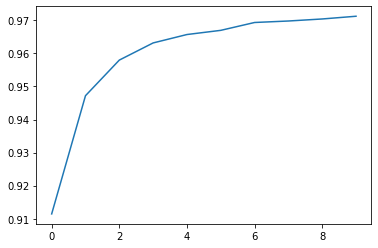

In [96]:
plt.plot([metrics.r2_score(Y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [97]:
def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        utils.check_random_state(rs).randint(0, n_samples, n_samples))

In [98]:
reset_rf_samples()

In [99]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

### Clearly, it got exhausted while going to the last leaf 

In [105]:
m = RandomForestClassifier(n_estimators=20, n_jobs=-1, oob_score=True)
m.fit(X_train, Y_train)
print_score(m)

R:\ML\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
R:\ML\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


ValueError: math domain error